In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
df = pd.read_csv("Student_performance_data_.csv")

# Preprocessing

In [3]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


### Remove irrelevant features

Drop StudentID

In [4]:
df = df.drop(df.columns[0], axis=1)

GradeClass has a high correlation because it is categorized based on out target variable, GPA. Remove this column. 

In [5]:
df = df.drop(df.columns[13], axis=1)

### Check for null values

In [6]:
df.isna().sum()

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
dtype: int64

No null values

Check types

In [7]:
print(df.dtypes)

Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
dtype: object


### Encode categorical variables

One-hot encoding for ethnicity creates separate binary columns for each ethnicity to avoid introducing false relationships.

In [8]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding for Ethnicity
df = pd.get_dummies(df, columns=['Ethnicity'], drop_first=True)

In [9]:
df.columns

Index(['Age', 'Gender', 'ParentalEducation', 'StudyTimeWeekly', 'Absences',
       'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music',
       'Volunteering', 'GPA', 'Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3'],
      dtype='object')

### Scale Numerical features

In [10]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#numerical_features = ['Age', 'StudyTimeWeekly', 'Absences']
#df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [11]:
df.head()

,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,17,1,2,19.833723,7,1,2,0,0,1,0,2.929196,0,0,0
1,18,0,1,15.408756,0,0,1,0,0,0,0,3.042915,0,0,0
2,15,0,3,4.210570,26,0,2,0,0,0,0,0.112602,0,1,0
3,17,1,3,10.028829,14,0,3,1,0,0,0,2.054218,0,0,0
4,17,1,2,4.672495,17,1,3,0,0,0,0,1.288061,0,0,0


### Check for outliers

<Axes: >

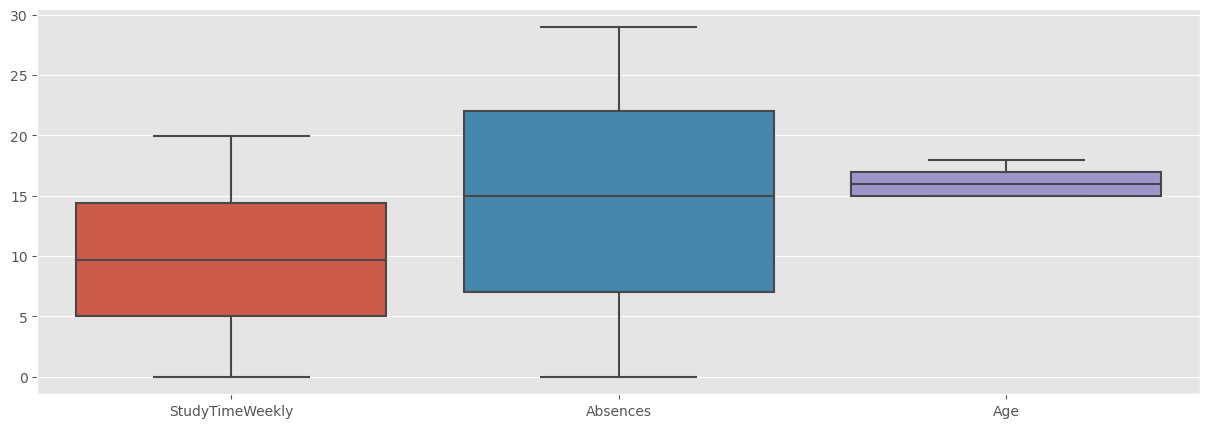

In [12]:
import seaborn as sns
sns.boxplot(data=df[['StudyTimeWeekly', 'Absences', 'Age']])


## Visualize Correlations

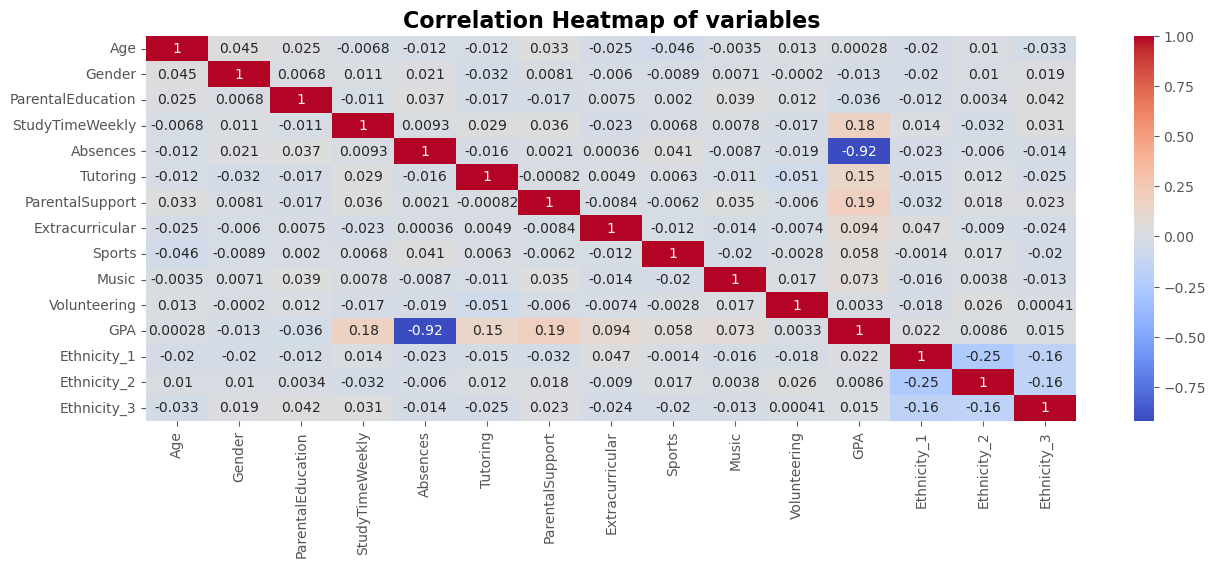

In [13]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of variables', fontsize=16, weight='bold')

plt.show()

### Correlations between Numerical Variables

                 StudyTimeWeekly  Absences       Age       GPA
StudyTimeWeekly         1.000000  0.009326 -0.006800  0.179275
Absences                0.009326  1.000000 -0.011511 -0.919314
Age                    -0.006800 -0.011511  1.000000  0.000275
GPA                     0.179275 -0.919314  0.000275  1.000000


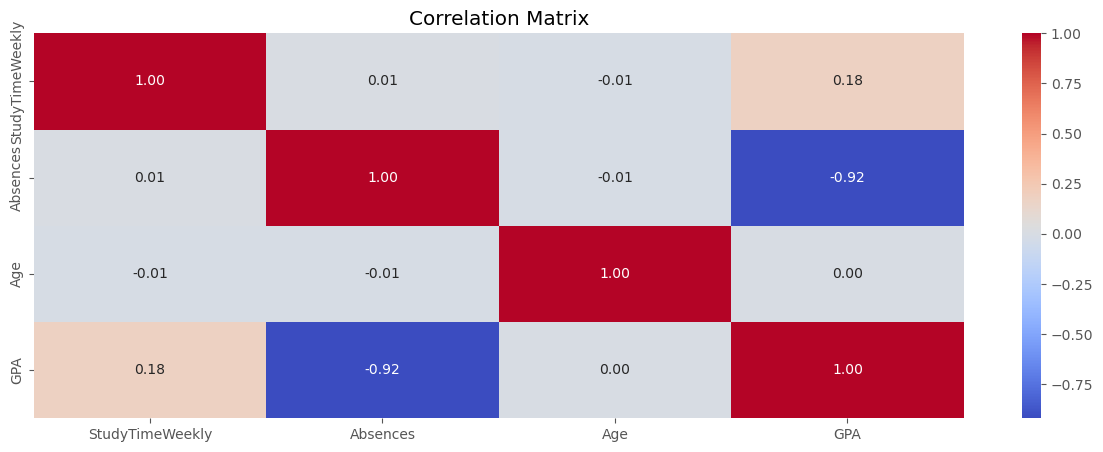

In [14]:
# Select numerical columns
numerical_features = ['StudyTimeWeekly', 'Absences', 'Age', 'GPA']

# Calculate correlation matrix
correlation_matrix = df[numerical_features].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlations with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Correlations Between Categorical Variables with GPA

Mean GPA by category

In [15]:
# Continuous Variables - Direct Mean Calculation
continuous_columns = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
continuous_means = df[continuous_columns].mean()
print("Mean of Continuous Variables:\n", continuous_means)

# Categorical Variables - Mean GPA by Category
categorical_columns = ['Gender', 'ParentalEducation', 'Tutoring', 'ParentalSupport',
                       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'Ethnicity_1', 
                       'Ethnicity_2', 'Ethnicity_3']

# For each categorical variable, calculate the mean of GPA by group
for col in categorical_columns:
    mean_gpa_by_category = df.groupby(col)['GPA'].mean()
    print(f"\nMean GPA by {col}:\n", mean_gpa_by_category)

Mean of Continuous Variables:
 Age                16.468645
StudyTimeWeekly     9.771992
Absences           14.541388
GPA                 1.906186
dtype: float64

Mean GPA by Gender:
 Gender
0    1.918679
1    1.894225
Name: GPA, dtype: float64

Mean GPA by ParentalEducation:
 ParentalEducation
0    1.893045
1    1.944022
2    1.929881
3    1.809082
4    1.815812
Name: GPA, dtype: float64

Mean GPA by Tutoring:
 Tutoring
0    1.818968
1    2.108325
Name: GPA, dtype: float64

Mean GPA by ParentalSupport:
 ParentalSupport
0    1.540128
1    1.755700
2    1.884246
3    2.042409
4    2.191545
Name: GPA, dtype: float64

Mean GPA by Extracurricular:
 Extracurricular
0    1.838316
1    2.015357
Name: GPA, dtype: float64

Mean GPA by Sports:
 Sports
0    1.871240
1    1.986381
Name: GPA, dtype: float64

Mean GPA by Music:
 Music
0    1.872969
1    2.041664
Name: GPA, dtype: float64

Mean GPA by Volunteering:
 Volunteering
0    1.904899
1    1.913089
Name: GPA, dtype: float64

Mean GPA by Ethni

In [16]:
df.to_csv('student_data_preprocessed.csv', index=False)